Loading the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import json

In [4]:
dataset = pd.read_csv('../Dataset/dataset_B_05_2020.csv')
dataset.head 

<bound method NDFrame.head of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Extracting X and Y from the Dataset.

In [6]:
#The dataset is clean and balanced

#Extracting X and Y
X = dataset.drop('url', axis = 1).drop('status', axis = 1)
Y = [1 if i == 'legitimate' else 0 for i in dataset['status']]

Splitting the dataset into Training data and Validation data(Test Data) while scaling the data.

In [7]:
#Splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

#Scaling the data
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

Loading the selected Hyperparameters

In [8]:
filename = '../Files/param.txt'
with open(filename) as f:
    params = json.load(f)

Defining a common training funtion for diffferent models.

Returns the Time taken, Accuracy, Macro f1 score and the trained model.

In [9]:
def training(model, x_train, y_train, x_test, y_test):
    tic = time.time()
    model.fit(x_train, y_train)
    toc = time.time()
    train_time = toc - tic
    y_pred = model.predict(x_test)
    accuracy = np.round(accuracy_score(y_test, y_pred), 4)
    macro_f1 = np.round(f1_score(y_test, y_pred), 4)
    recall = np.round(recall_score(y_test, y_pred), 4)
    logl = np.round(log_loss(y_test, y_pred), 4)
    print(f'Train Size = {len(y_train)}, Test Size = {len(y_test)}')
    print(f'Time taken = {train_time}')
    print(f'Accuracy = {accuracy}')
    print(f'Macro F1 Score = {macro_f1}')
    print(f'Recall = {recall}')
    print(f'Log Loss = {logl}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)
    plt.show()
    return [model, train_time, accuracy, macro_f1, recall, logl]

model_comp = {}

Machine Learning Models

In [10]:
model = ['svm', 'logistic_regression', 'decision_tree', 'random_forest']
voting = ['hard', 'soft']

svm_model = SVC(probability = True, **params[model[0]])
logistic_model = LogisticRegression(solver = 'liblinear', max_iter = 1000, **params[model[1]])
decision_tree_model = DecisionTreeClassifier(**params[model[2]])
random_forest_model = RandomForestClassifier(n_estimators = 150, **params[model[3]])   

estimator = []
estimator.append([model[0], svm_model])
estimator.append([model[1], logistic_model])
estimator.append([model[2], decision_tree_model])
estimator.append([model[3], random_forest_model])

Majority Voting

Majority Voting Type: hard
Train Size = 8001, Test Size = 3429
Time taken = 7.188603162765503
Accuracy = 0.9618
Macro F1 Score = 0.9618
Recall = 0.9527
Log Loss = 1.377
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1697
           1       0.97      0.95      0.96      1732

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429

Confusion Matrix:


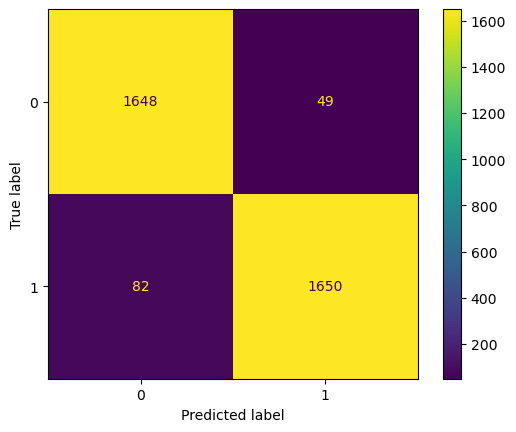

Majority Voting Type: soft
Train Size = 8001, Test Size = 3429
Time taken = 6.623289346694946
Accuracy = 0.9662
Macro F1 Score = 0.9666
Recall = 0.9677
Log Loss = 1.2193
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1697
           1       0.97      0.97      0.97      1732

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429

Confusion Matrix:


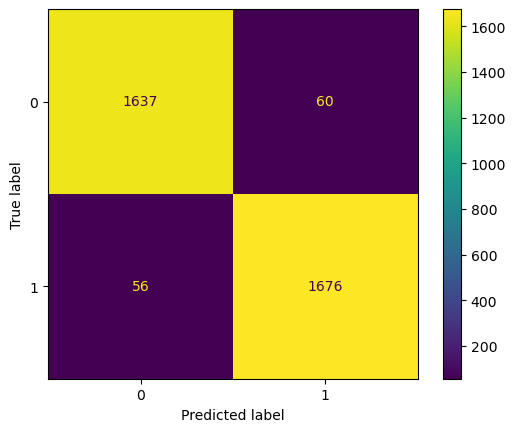

In [11]:
for i in voting:
    print(f'Majority Voting Type: {i}')
    model = VotingClassifier(estimators = estimator, voting = i) 
    model_comp[i] = training(model, x_train_sc, y_train, x_test_sc, y_test)

Model Comparison

In [12]:
plots = ['Time Taken', 'Accuracy', 'Macro F1 Score', 'Recall', 'Log Loss']
model_values = [i[1:] for i in model_comp.values()]
comp = pd.DataFrame(model_values, index = list(model_comp.keys()), columns = plots)
display(comp)

,Time Taken,Accuracy,Macro F1 Score,Recall,Log Loss
hard,7.188603,0.9618,0.9618,0.9527,1.3770
soft,6.623289,0.9662,0.9666,0.9677,1.2193


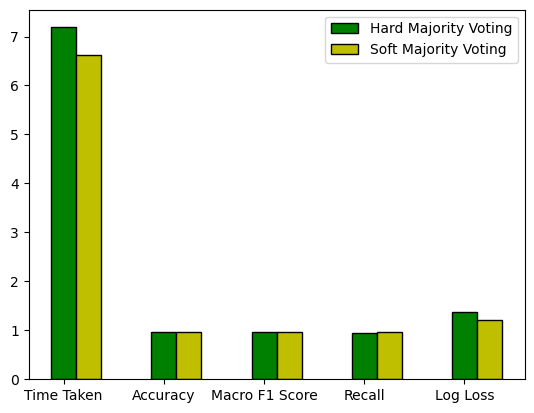

In [13]:
r = np.arange(len(plots))  
plt.bar(r, model_values[0], color = 'g', width = 0.25, edgecolor = 'black', label = 'Hard Majority Voting') 
plt.bar(r + 0.25, model_values[1], color = 'y', width = 0.25, edgecolor = 'black', label = 'Soft Majority Voting') 
plt.xticks(r, plots) 
plt.legend() 
plt.show() 